In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [59]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
all_data = pd.concat([train_data, test_data])

print (f'Combined set: {all_data.shape[0]} rows and {all_data.shape[1]} columns')
print ('\nSurvived?: ')
all_data['Survived'].value_counts(dropna = False)

Combined set: 1309 rows and 12 columns

Survived?: 


0.0    549
NaN    418
1.0    342
Name: Survived, dtype: int64

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
missing_counts = train_data.isnull().sum().sort_values(ascending = False) # 공백인 데이터들의 갯수를 내림차순정렬
percent = (train_data.isnull().sum()*100/train_data.shape[0]).sort_values(ascending = False) # 백분율로 표시

missing_data = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print('Missing values: ')
display(missing_data.style.background_gradient(cmap = 'Reds', axis = 0))

Missing values: 


,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [65]:
train_data.describe() #숫자로된 정보만 줌

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


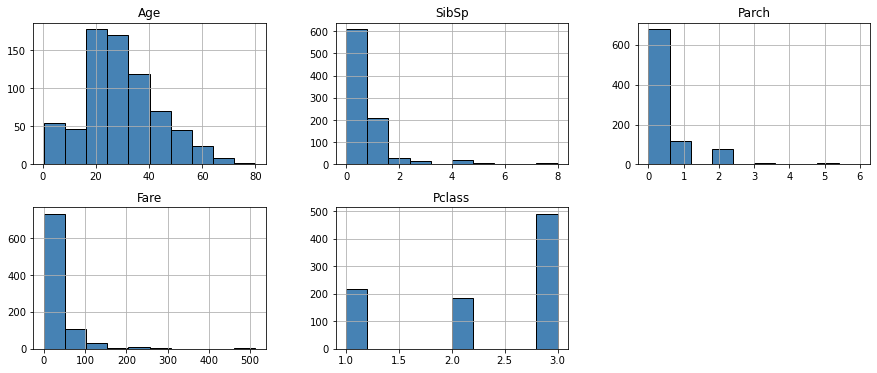

In [66]:
num_atts = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
train_data[num_atts].hist(figsize = (15, 6), color = 'steelblue', edgecolor = 'black', linewidth = 1, layout = (2, 3));
## 각 attrubute들의 분포 시각화

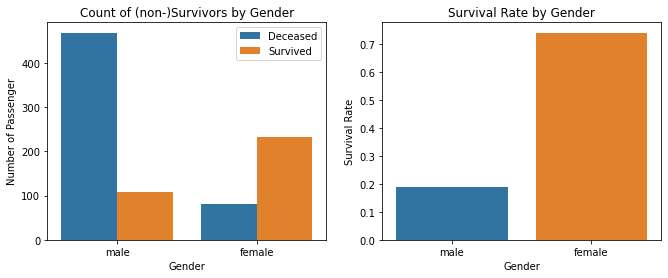

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 4))

sns.countplot(x = 'Sex', hue = 'Survived', data = train_data, ax = ax1) 
ax1.set_title('Count of (non-)Survivors by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Passenger')
ax1.legend(labels = ['Deceased', 'Survived'])

sns.barplot(x = 'Sex', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Survival Rate');
## 남자는 생존율이 20%, 여자는 생존률 75%

In [68]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


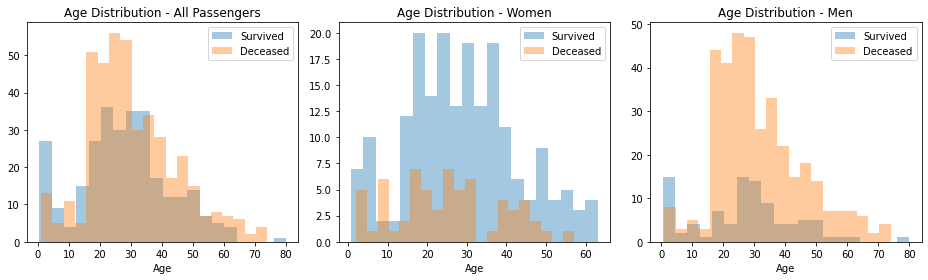

In [69]:
men = train_data[train_data['Sex']  == 'male']
women = train_data[train_data['Sex']  == 'female']

### 그래프
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 4))
# 생존/사망자 나이분포
sns.distplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax1, kde = False)
sns.distplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax1, kde = False)
ax1.legend()
ax1.set_title('Age Distribution - All Passengers')
# 생존/사망자 나이분포(여자)
sns.distplot(women[women['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax2, kde = False)
sns.distplot(women[women['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax2, kde = False)
ax2.legend()
ax2.set_title('Age Distribution - Women')
# 생존/사망자 나이분포(남자)
sns.distplot(men[men['Survived'] == 1]['Age'].dropna(), bins = 20, label = 'Survived', ax = ax3, kde = False)
sns.distplot(men[men['Survived'] == 0]['Age'].dropna(), bins = 20, label = 'Deceased', ax = ax3, kde = False)
ax3.legend()
ax3.set_title('Age Distribution - Men')

plt.tight_layout()
# 15~30세, 30~40세, 40~50세의 생존분포가 비슷함

In [70]:
train_data['Age_Bin'] = (train_data['Age']//15)*15 # 15단위로 정수화
train_data[['Age_Bin', 'Survived']].groupby(['Age_Bin']).mean() # 각 나이(0, 15, 30, 45세) 의 생존율확인

,Survived
Age_Bin,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


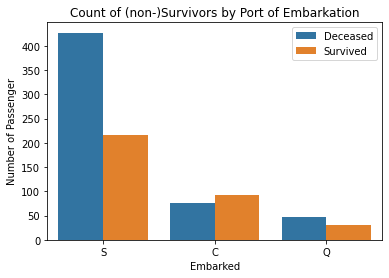

In [71]:
### Embarked 그래프
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data) 
plt.ylabel('Number of Passenger')
plt.title('Count of (non-)Survivors by Port of Embarkation')
plt.legend(['Deceased', 'Survived']);
#  (C = Cherbourg; Q = Queenstown; S = Southampton)
# 어디서 탑승했는지와 생존가능성을 연관성을 찾기가 어려워보임

In [72]:
print ('Number of passengers in each class:')
train_data['Pclass'].value_counts(sort=False)

Number of passengers in each class:


1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0, 0.5, 'Survival Rate')

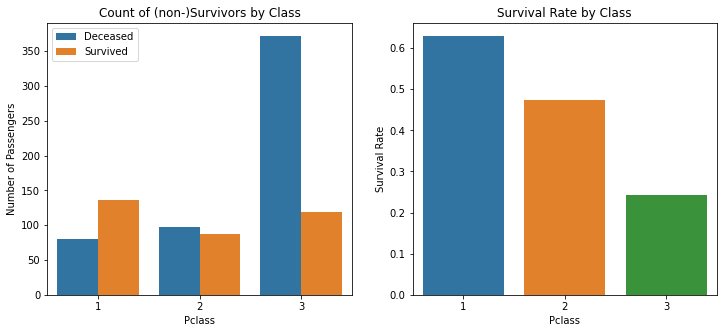

In [73]:
### 좌석클래스별 생존율 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, ax = ax1) 
ax1.legend(['Deceased', 'Survived'])
ax1.set_title('Count of (non-)Survivors by Class')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_ylabel('Survival Rate')
# 1등석의 생존율이 가장 높고, 3등석의 사망률이 가장 낮

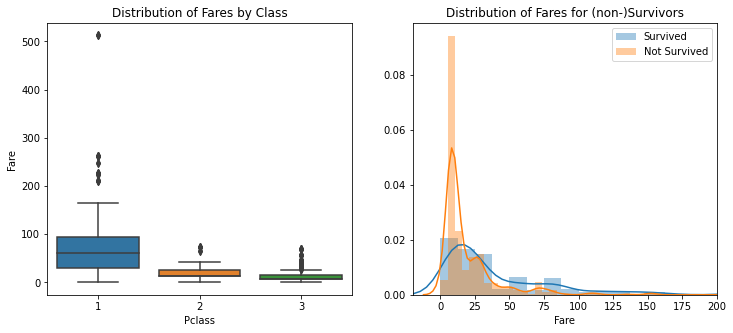

In [74]:
### 요금 그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(x = 'Pclass', y = 'Fare', data = train_data, ax = ax1)
ax1.set_title('Distribution of Fares by Class')

sns.distplot(train_data[train_data['Survived'] == 1]['Fare'], label = 'Survived', ax = ax2)
sns.distplot(train_data[train_data['Survived'] == 0]['Fare'], label = 'Not Survived', ax = ax2)
ax2.set_title('Distribution of Fares for (non-)Survivors')
ax2.set_xlim([-20, 200])
ax2.legend()
# class와 fare 사이의 상관관계

In [75]:
train_data['Fare_Bin'] = pd.qcut(train_data['Fare'], 5) # 5단계로 자르기
train_data[['Fare_Bin', 'Survived']].groupby(['Fare_Bin']).mean()

,Survived
Fare_Bin,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


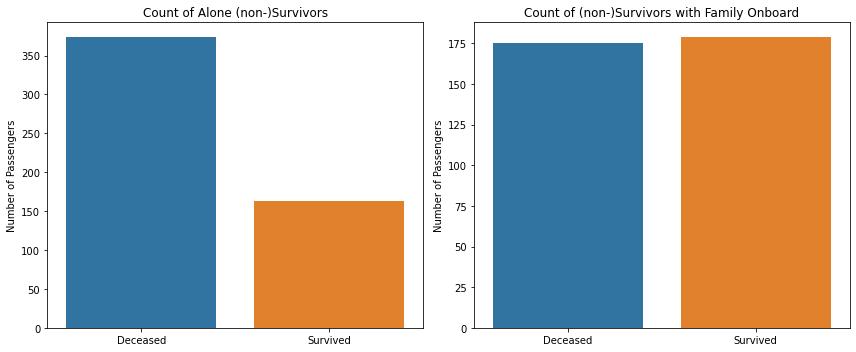

In [76]:
alone = train_data[(train_data['SibSp'] == 0) & (train_data['Parch'] == 0)]
not_alone = train_data[(train_data['SibSp'] != 0) | (train_data['Parch'] != 0)]

### 혼자인사람과 가족이있는사람 비교그래프
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
# 혼자인사람
sns.countplot(x = 'Survived', data = alone, ax = ax1) 
ax1.set_title('Count of Alone (non-)Survivors')
ax1.set_xlabel('')
ax1.set_xticklabels(['Deceased', 'Survived'])
ax1.set_ylabel('Number of Passengers')
# 배우자, 형제, 부모, 자식이 있는사람
sns.countplot(x = 'Survived', data = not_alone, ax = ax2) 
ax2.set_title('Count of (non-)Survivors with Family Onboard')
ax2.set_xlabel('')
ax2.set_xticklabels(['Deceased', 'Survived'])
ax2.set_ylabel('Number of Passengers')

plt.tight_layout()
# 혼자인사람의 생존률이 더 낮았음.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Survival rate by Number of Relatives Onboard')

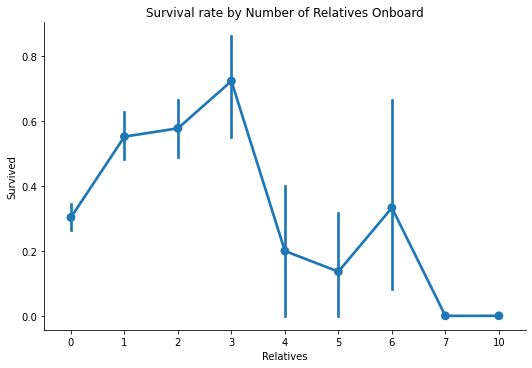

In [77]:
### 친인척의 수와 생존률과의 상관관계 그래프
train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']

sns.factorplot('Relatives', 'Survived', data = train_data, aspect = 1.5)
plt.title('Survival rate by Number of Relatives Onboard')
# 1~3명의 친인척이 있다면 생존률이 올라간다고 볼 수 있음

In [78]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) # ,로 split 후 .로 split

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
                           'Rare Title', inplace = True)
train_data['Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

Text(0, 0.5, 'Survival Rate')

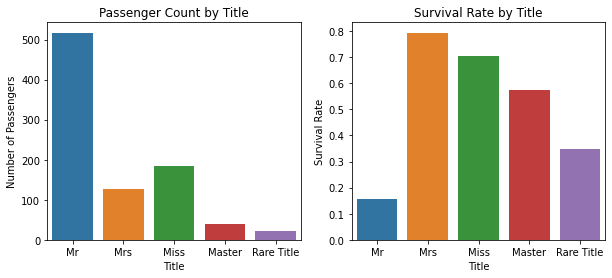

In [79]:
### 호칭(Mr, Ms, Mrs, Miss) 에 따른 생존률
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

sns.countplot(x = 'Title', data = train_data, ax = ax1)
ax1.set_title('Passenger Count by Title')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Title', y = 'Survived', data = train_data, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Title')
ax2.set_ylabel('Survival Rate')
# 여성인 Mrs와 Miss 가 생존률이 높음
# 남성인 Mr가 생존률이 가장 낮음

In [80]:
# 그래프의 시각화를 토대로 반영할 Attributes를 결정 :
# Sex, Age, Pclass, Fare, SibSp, Parch, Name, Ticket

In [81]:
# Age와 Fare의 공란을 중간값으로 채워넣기
all_data['Age'] = all_data['Age'].fillna(train_data['Age'].median())
all_data['Fare'] = all_data['Fare'].fillna(train_data['Fare'].median())
print ('Done!')

Done!


In [82]:
# 재가공한 데이터 열 추가하기('Family_Survival', 'Age_Bin', 'Fare_Bin', 'Relatives', 'Title).

all_data['Last_Name'] = all_data['Name'].apply(lambda x: str.split(x, ',')[0])
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace = True)

default_sr_value = 0.5
all_data['Family_Survival'] = default_sr_value

for grp, grp_data in all_data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_data) != 1):  # A Family group is found.
        for ind, row in grp_data.iterrows():
            smax = grp_data.drop(ind)['Survived'].max()
            smin = grp_data.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            
            if (smax == 1.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0

for _, grp_data in all_data.groupby('Ticket'):
    
    if (len(grp_data) != 1):
        for ind, row in grp_data.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_data.drop(ind)['Survived'].max()
                smin = grp_data.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                
                if (smax == 1.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0
                    
#####################################################################################
all_data['Age_Bin'] = (all_data['Age']//15)*15
all_data['Fare_Bin'] = pd.qcut(all_data['Fare'], 5)
all_data['Relatives'] = all_data['SibSp'] + all_data['Parch']
#####################################################################################
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'}, inplace = True)
all_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'],
                           'Rare Title', inplace = True)    

print ('Done!')

Done!


In [83]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
all_data['Fare_Bin'] = LabelEncoder().fit_transform(all_data['Fare_Bin'])
all_data['Age_Bin'] = LabelEncoder().fit_transform(all_data['Age_Bin'])
all_data['Title_Bin'] = LabelEncoder().fit_transform(all_data['Title'])
all_data['Sex'] = LabelEncoder().fit_transform(all_data['Sex'])

print ('Done!')

Done!


In [84]:
#나머지 필요없는 columns 지우기
all_data.drop(['PassengerId', 'Age', 'Fare', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Title', 'Last_Name', 'Embarked'], axis = 1, inplace = True)

print ('Done!')
print ('Modified dataset: ')
all_data.head()

Done!
Modified dataset: 


,Survived,Pclass,Sex,Family_Survival,Age_Bin,Fare_Bin,Relatives,Title_Bin
0,0.0,3,1,0.5,1,0,1,2
1,1.0,1,0,0.5,2,4,1,3
2,1.0,3,0,0.5,1,1,0,1
3,1.0,1,0,0.0,2,4,1,3
4,0.0,3,1,0.5,2,1,0,2


In [85]:
# 데이터셋을 트레인셋과 테스트셋으로 다시 분리하고 스케일링
train_data = all_data[:891]

X_train = train_data.drop('Survived', 1)
y_train = train_data['Survived']

#######################################################

test_data = all_data[891:]

X_test = test_data.copy()
X_test.drop('Survived', axis = 1, inplace = True)
print ('Splitting: Done!')

Splitting: Done!


In [86]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)  # fit_transform the X_train
X_test_scaled = std_scaler.transform(X_test)        # only transform the X_test

print ('Scaling: Done!')

Scaling: Done!


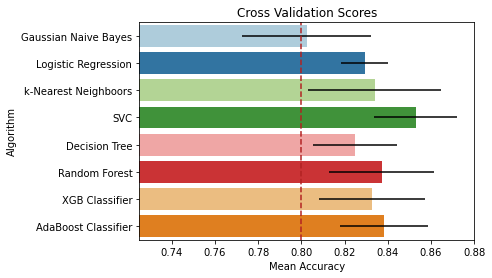

In [87]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier


random_state = 1

# Step 1: create a list containing all estimators with their default parameters
clf_list = [GaussianNB(), 
            LogisticRegression(random_state = random_state),
            KNeighborsClassifier(), 
            SVC(random_state = random_state, probability = True),
            DecisionTreeClassifier(random_state = random_state), 
            RandomForestClassifier(random_state = random_state),
            XGBClassifier(random_state = random_state), 
            AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state), random_state = random_state)]


# Step 2: calculate the cv mean and standard deviation for each one of them
cv_base_mean, cv_std = [], []
for clf in clf_list:  
    
    cv = cross_val_score(clf, X_train_scaled, y = y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
    
    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

    
# Step 3: create a dataframe and plot the mean with error bars
cv_total = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes', 'Logistic Regression', 'k-Nearest Neighboors', 'SVC', 'Decision Tree', 'Random Forest', 'XGB Classifier', 'AdaBoost Classifier'],
                         'CV-Means': cv_base_mean, 
                         'CV-Errors': cv_std})

sns.barplot('CV-Means', 'Algorithm', data = cv_total, palette = 'Paired', orient = 'h', **{'xerr': cv_std})
plt.xlabel('Mean Accuracy')
plt.title('Cross Validation Scores')
plt.xlim([0.725, 0.88])
plt.axvline(x = 0.80, color = 'firebrick', linestyle = '--')

# k = 5folds 를 적용하여 cross validation 수행
# 4 folds로 트레이닝, 나머지 1fold 로 성능측정

In [88]:
estimators = [('gnb', clf_list[0]), ('lr', clf_list[1]),
              ('knn', clf_list[2]), ('svc', clf_list[3]),
              ('dt', clf_list[4]), ('rf', clf_list[5]),
              ('xgb', clf_list[6]), ('ada', clf_list[7])]

base_voting_hard = VotingClassifier(estimators = estimators , voting = 'hard')
base_voting_soft = VotingClassifier(estimators = estimators , voting = 'soft') 

cv_hard = cross_val_score(base_voting_hard, X_train_scaled, y_train, cv = 5)
cv_soft = cross_val_score(base_voting_soft, X_train_scaled, y_train, cv = 5)

print ('Baseline Models - Ensemble\n--------------------------')
print ('Hard Voting: {}%'.format(np.round(cv_hard.mean()*100, 1)))
print ('Soft Voting: {}%'.format(np.round(cv_soft.mean()*100, 1)))
# ensemble 을 이용하여 성능측정

Baseline Models - Ensemble
--------------------------
Hard Voting: 84.3%
Soft Voting: 84.3%


In [ ]:
base_voting_hard.fit(X_train_scaled, y_train)
base_voting_soft.fit(X_train_scaled, y_train)

y_pred_base_hard = base_voting_hard.predict(X_test_scaled)
y_pred_base_soft = base_voting_hard.predict(X_test_scaled)

In [102]:
cv_means_tuned = [np.nan] # we can't actually tune the GNB classifier, so we fill its element with NaN

#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('-------------------------------')
    print('   Best Score: ' + str(classifier.best_score_))
    print('   Best Parameters: ' + str(classifier.best_params_))
    
    cv_means_tuned.append(classifier.best_score_)

In [103]:
### Logistic Regression
lr = LogisticRegression()

param_grid = {'max_iter' : [100],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-2, 2, 20),
              'solver' : ['lbfgs', 'liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s


Logistic Regression
-------------------------------
   Best Score: 0.8361370912058252
   Best Parameters: {'C': 0.026366508987303583, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


In [104]:
### k-Nearest Neighbors
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3, 30, 2),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto'],
              'p': [1, 2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    1.0s


KNN
-------------------------------
   Best Score: 0.8495888519239218
   Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.3s finished


In [105]:
### Support Vector Classifier
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 
                                  'gamma': [0.01, 0.1, 0.5, 1, 2, 5],
                                  'C': [.1, 1, 2, 5]},
                                 {'kernel': ['linear'], 
                                  'C': [.1, 1, 2, 10]},
                                 {'kernel': ['poly'], 
                                  'degree' : [2, 3, 4, 5], 
                                  'C': [.1, 1, 10]}]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s


SVC
-------------------------------
   Best Score: 0.8529470843010483
   Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.5s finished


In [106]:
### DecisionTree
dt = DecisionTreeClassifier(random_state = 1)
param_grid = {'max_depth': [3, 5, 10, 20, 50],
              'criterion': ['entropy', 'gini'],
              'min_samples_split': [5, 10, 15, 30],
              'max_features': [None, 'auto', 'sqrt', 'log2']}
                                  
clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dt = clf_dt.fit(X_train_scaled, y_train)
clf_performance(best_clf_dt, 'Decision Tree')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.7s


Decision Tree
-------------------------------
   Best Score: 0.8529345301613207
   Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_split': 10}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.1s finished


In [107]:
### RandomForest
rf = RandomForestClassifier(random_state = 42)
param_grid = {'n_estimators': [50, 150, 300, 450],
              'criterion': ['entropy'],
              'bootstrap': [True],
              'max_depth': [3, 5, 10],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [2, 3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  1.5min


Random Forest
-------------------------------
   Best Score: 0.8518234887954301
   Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.6min finished


Text(0.5, 0, 'Importance')

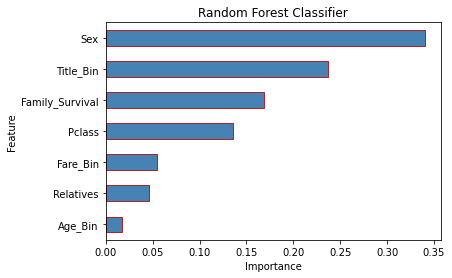

In [108]:
best_rf = best_clf_rf.best_estimator_

importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': np.round(best_rf.feature_importances_, 3)})

importances = importances.sort_values('Importance', ascending = True).set_index('Feature')

importances.plot.barh(color = 'steelblue', edgecolor = 'firebrick', legend=False)
plt.title('Random Forest Classifier')
plt.xlabel('Importance')

In [109]:
### XGBoost Classifier
xgb = XGBClassifier(random_state = 42)

param_grid = {'n_estimators': [15, 25, 50, 100],
              'colsample_bytree': [0.65, 0.75, 0.80],
              'max_depth': [None],
              'reg_alpha': [1],
              'reg_lambda': [1, 2, 5],
              'subsample': [0.50, 0.75, 1.00],
              'learning_rate': [0.01, 0.1, 0.5],
              'gamma': [0.5, 1, 2, 5],
              'min_child_weight': [0.01],
              'sampling_method': ['uniform']}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB')

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 3288 tasks      | elapsed:   33.5s


XGB
-------------------------------
   Best Score: 0.8563411896745231
   Best Parameters: {'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 25, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.75}


[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed:   39.7s finished


Text(0.5, 0, 'Importance')

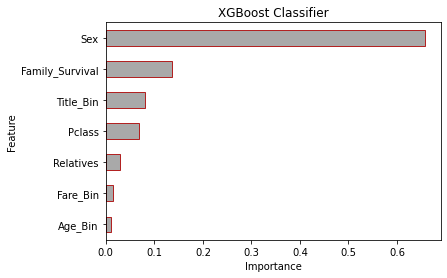

In [110]:
best_xgb = best_clf_xgb.best_estimator_

importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': np.round(best_xgb.feature_importances_, 3)})

importances = importances.sort_values('Importance', ascending = True).set_index('Feature')

importances.plot.barh(color = 'darkgray', edgecolor = 'firebrick', legend = False)
plt.title('XGBoost Classifier')
plt.xlabel('Importance')

In [111]:
### AdaBoost
adaDTC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = random_state), random_state=random_state)

param_grid = {'algorithm': ['SAMME', 'SAMME.R'],
              'base_estimator__criterion' : ['gini', 'entropy'],
              'base_estimator__splitter' : ['best', 'random'],
              'n_estimators': [2, 5, 10, 50],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 1, 2]}

clf_ada = GridSearchCV(adaDTC, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)
best_clf_ada = clf_ada.fit(X_train_scaled, y_train)

clf_performance(best_clf_ada, 'AdaBost')

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    3.6s


AdaBost
-------------------------------
   Best Score: 0.8428661100998054
   Best Parameters: {'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 5}


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   19.2s finished


In [112]:
cv_total = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes', 'Logistic Regression', 'k-Nearest Neighboors', 'SVC', 'Decision Tree', 'Random Forest', 'XGB Classifier', 'AdaBoost Classifier'],
                         'Baseline': cv_base_mean, 
                         'Tuned Performance': cv_means_tuned})

cv_total

,Algorithm,Baseline,Tuned Performance
0,Gaussian Naive Bayes,0.802517,NaN
1,Logistic Regression,0.829414,0.836137
2,k-Nearest Neighboors,0.833934,0.849589
3,SVC,0.852947,0.852947
4,Decision Tree,0.824939,0.852935
5,Random Forest,0.837273,0.851823
6,XGB Classifier,0.832785,0.856341
7,AdaBoost Classifier,0.838403,0.842866


In [113]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_dt = best_clf_dt.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_
# best_ada = best_clf_ada.best_estimator_  # didn't help me in my final ensemble

estimators = [('lr', best_lr), ('knn', best_knn), ('svc', best_svc),
              ('rf', best_rf), ('xgb', best_xgb), ('dt', best_dt)]

tuned_voting_hard = VotingClassifier(estimators = estimators, voting = 'hard', n_jobs = -1)
tuned_voting_soft = VotingClassifier(estimators = estimators, voting = 'soft', n_jobs = -1)

tuned_voting_hard.fit(X_train_scaled, y_train)
tuned_voting_soft.fit(X_train_scaled, y_train)

cv_hard = cross_val_score(tuned_voting_hard, X_train_scaled, y_train, cv = 5)
cv_soft = cross_val_score(tuned_voting_soft, X_train_scaled, y_train, cv = 5)

print ('Tuned Models - Ensemble\n-----------------------')
print ('Hard Voting: {}%'.format(np.round(cv_hard.mean()*100, 2)))
print ('Soft Voting: {}%'.format(np.round(cv_soft.mean()*100, 2)))

y_pred_tuned_hd = tuned_voting_hard.predict(X_test_scaled).astype(int)
y_pred_tuned_sf = tuned_voting_soft.predict(X_test_scaled).astype(int)

Tuned Models - Ensemble
-----------------------
Hard Voting: 85.18%
Soft Voting: 85.18%


In [114]:
test_df = pd.DataFrame(pd.read_csv('../input/titanic/test.csv')['PassengerId'])

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_base_hard.astype(int)}).to_csv('01-Baseline_Hard_voting.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_base_soft.astype(int)}).to_csv('02-Baseline_Soft_voting.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_tuned_hd.astype(int)}).to_csv('03-Tuned_Hard_Voting.csv', index = False)

pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 
                     'Survived': y_pred_tuned_sf.astype(int)}).to_csv('04-Tuned_Soft_Voting.csv', index = False)

NameError: name 'y_pred_base_hard' is not defined